
## **0. Background**

Sebuah unit usaha ingin membuka showroom mobil dengan segmentasi target market adalah middle class. Mereka lalu menyewa kita untuk menganalisa seperti apa selera middle class ini, mari kita analisis seperti apa seleranya.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.cubehelix_palette(dark=.25, light=.75)
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [167]:
df = pd.read_csv('/content/drive/MyDrive/PURWADHIKA/Dataset/Car Sales.xlsx - car_data.csv')
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


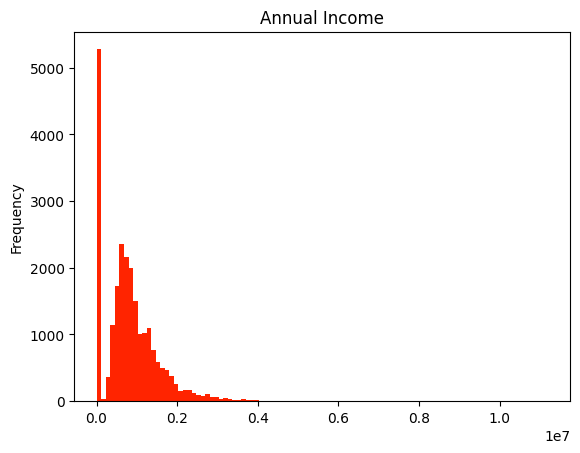

In [168]:
# Check Persebaran Kolom Annual Income
ax = df['Annual Income'].plot(kind='hist', bins=100, title = 'Annual Income')

**Ada temuan menarik!**
ada sebaran data Annual Income yang punya frekuensi terbanyak. Mari kita Explore!

In [169]:
pd.crosstab(index=df['Annual Income'],
            columns='Count').sort_values(by='Count', ascending=False).head(3)

col_0,Count
Annual Income,
13500,5273
1100000,162
600000,160


Annual income dengan frekuensi tertinggi bernilai **13500** sebanyak **5273** transaksi. **Berikutnya customer dengan Annual Income 13500 ini yang kita definisikan sebagai Middle Class**

In [170]:
df = df[df['Annual Income'] == 13500]
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin


In [171]:
# Drop Data yang tidak digunakan
df = df[[#'Car_id','Date',
         'Customer Name', 'Gender', #'Annual Income',
         'Dealer_Name', 'Company', 'Model', 'Engine',
         'Transmission', 'Color','Price ($)', #'Dealer_No ',
         'Body Style','Phone',
         'Dealer_Region']]
df.head(3)

,Customer Name,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Phone,Dealer_Region
0,Geraldine,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,8264678,Middletown
3,Giselle,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,6257557,Pasco
7,Graham,Male,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,Passenger,6206512,Austin


In [172]:
# Reindex Kolom
df = df.reindex(['Customer Name','Phone', 'Gender','Dealer_Name', 'Dealer_Region',
                 'Company', 'Model','Engine','Transmission', 'Color', 'Price ($)', 'Body Style'], axis=1)
df.head(3)

,Customer Name,Phone,Gender,Dealer_Name,Dealer_Region,Company,Model,Engine,Transmission,Color,Price ($),Body Style
0,Geraldine,8264678,Male,Buddy Storbeck's Diesel Service Inc,Middletown,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV
3,Giselle,6257557,Male,Chrysler of Tri-Cities,Pasco,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV
7,Graham,6206512,Male,U-Haul CO,Austin,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,Passenger


_____________________________________________________________________________________

## **1. Data Understanding & Data Cleaning**


**1.1. Pengecekan Type dan Dimensi Data**

In [173]:
# pengecekan tipe data
print(f'Jumlah baris dan kolom di dataset ini berturut-turut adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset ini berturut-turut adalah (5273, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 23904
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  5273 non-null   object
 1   Phone          5273 non-null   int64 
 2   Gender         5273 non-null   object
 3   Dealer_Name    5273 non-null   object
 4   Dealer_Region  5273 non-null   object
 5   Company        5273 non-null   object
 6   Model          5273 non-null   object
 7   Engine         5273 non-null   object
 8   Transmission   5273 non-null   object
 9   Color          5273 non-null   object
 10  Price ($)      5273 non-null   int64 
 11  Body Style     5273 non-null   object
dtypes: int64(2), object(10)
memory usage: 664.6+ KB


**1.2. Statistik Deskriptif**

In [174]:
display(df.describe(),
        df.describe(include='object'))

,Phone,Price ($)
count,5.273000e+03,5273.000000
mean,7.509078e+06,27878.981415
std,8.747943e+05,14904.756077
min,6.000101e+06,1200.000000
25%,6.744055e+06,18000.000000
50%,7.534251e+06,22001.000000
75%,8.258144e+06,34000.000000
max,8.998913e+06,85001.000000


,Customer Name,Gender,Dealer_Name,Dealer_Region,Company,Model,Engine,Transmission,Color,Body Style
count,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273
unique,1719,2,28,7,30,154,2,2,3,5
top,Thomas,Male,Tri-State Mack Inc,Austin,Chevrolet,Passat,DoubleÂ Overhead Camshaft,Auto,Pale White,SUV
freq,21,4137,291,925,399,100,2722,2722,2445,1418


In [175]:
# Deskripsi Data
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Fitur Data',
    'Type Data',
    'Null',
    'Unique Value',
    'Unique Sample'
])

,Fitur Data,Type Data,Null,Unique Value,Unique Sample
0,Customer Name,object,0,1719,"[Kyle, Helen]"
1,Phone,int64,0,5265,"[8657888, 6737309]"
2,Gender,object,0,2,"[Male, Female]"
3,Dealer_Name,object,0,28,"[Tri-State Mack Inc, Diehl Motor CO Inc]"
4,Dealer_Region,object,0,7,"[Middletown, Janesville]"
5,Company,object,0,30,"[Oldsmobile, Mitsubishi]"
6,Model,object,0,154,"[Carrera Coupe, Seville]"
7,Engine,object,0,2,"[Overhead Camshaft, DoubleÂ Overhead Camshaft]"
8,Transmission,object,0,2,"[Auto, Manual]"
9,Color,object,0,3,"[Black, Pale White]"


**1.3. Pengecekan Duplicate Value**

In [176]:
# Duplicate Value
df.duplicated().sum()

0

**1.4. Pengecekan Missing Value**

In [177]:
#Check Missing Value
df.isnull().sum()

Customer Name    0
Phone            0
Gender           0
Dealer_Name      0
Dealer_Region    0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
dtype: int64

**1.5. Pengecekan Outliers**

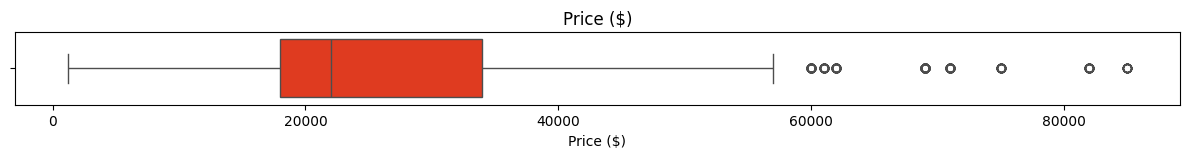

In [178]:
# Pengecekan Outliers
feature = ['Price ($)']
plt.figure(figsize=(12, 6.5))

for idx, col in enumerate(feature, start=1):
    plt.subplot(5, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

kita memutuskan untuk tidak membuang outlier karena price fungsi numerik continue, maka konsekwensinya semua perhitungan dari **Price ($) tidak menggunakan fungsi mean/Rata-rata karena akan membuat nilainya bias.**
kita juga akan mencari nama customer yang membeli mobil lebih mahal diluar kebiasaan yang lain. Mari kita cari!

In [179]:
df[df['Price ($)']>= 60000]

,Customer Name,Phone,Gender,Dealer_Name,Dealer_Region,Company,Model,Engine,Transmission,Color,Price ($),Body Style
37,Haylee,7438037,Male,Gartner Buick Hyundai Saab,Greenville,Buick,Park Avenue,DoubleÂ Overhead Camshaft,Auto,Black,61000,Hatchback
145,John,8687698,Male,Race Car Help,Austin,Ford,Taurus,Overhead Camshaft,Manual,Black,69000,SUV
156,Noah,7887874,Female,Nebo Chevrolet,Middletown,Oldsmobile,Aurora,Overhead Camshaft,Manual,Pale White,71000,Passenger
170,Jordan,6642461,Male,Scrivener Performance Engineering,Greenville,Lincoln,Continental,Overhead Camshaft,Manual,Pale White,82000,Passenger
220,Kenneth,7755205,Male,Saab-Belle Dodge,Aurora,BMW,528i,DoubleÂ Overhead Camshaft,Auto,Pale White,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...
23652,Queena,8247405,Male,Clay Johnson Auto Sales,Austin,Mercedes-B,SLK230,Overhead Camshaft,Manual,Red,71000,Hatchback
23714,Lucie,7683363,Male,Classic Chevy,Scottsdale,Lexus,LS400,Overhead Camshaft,Manual,Black,69000,Sedan
23731,Killian,8732881,Male,Race Car Help,Scottsdale,Oldsmobile,Silhouette,DoubleÂ Overhead Camshaft,Auto,Black,60000,Sedan
23757,Clement,8283170,Female,Scrivener Performance Engineering,Aurora,Cadillac,DeVille,DoubleÂ Overhead Camshaft,Auto,Red,69000,SUV


In [180]:
# Outliers Price
CustHighPrice = df[df['Price ($)']>= 60000]
persentageCustHighPrice = (CustHighPrice.shape[0]/df.shape[0])*100

print(f'Banyaknya baris dan kolom Customer yang membeli mobil lebih mahal berturut-turut : {CustHighPrice.shape}')
print(f'Banyaknya baris dan kolom Customer yang memiliki penghasilan tahunan 13500 berturut-turut : {df.shape}')
print(f'Persentasenya :{persentageCustHighPrice} %')

Banyaknya baris dan kolom Customer yang membeli mobil lebih mahal berturut-turut : (331, 12)
Banyaknya baris dan kolom Customer yang memiliki penghasilan tahunan 13500 berturut-turut : (5273, 12)
Persentasenya :6.277261520955813 %


_____________________________________________________________________________________

## **2. Explolatory Data Analysis**

***Business Question 1 : Top 10 Vendor Mobil dengan Quantity penjualan dan Sales terbanyak selera kelas menengah?***

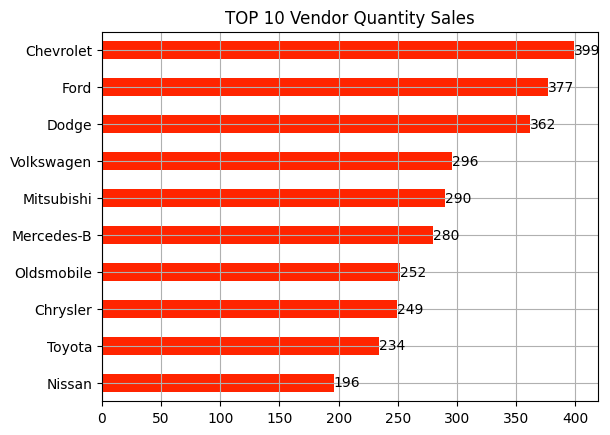

In [181]:
ax = df['Company'].value_counts(ascending=True).tail(10).plot(kind='barh',title='TOP 10 Vendor Quantity Sales')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(True)
plt.show()

In [182]:
df[['Company','Price ($)']].groupby('Company').sum().sort_values('Price ($)',ascending=False).head(10)

,Price ($)
Company,
Ford,10965277
Chevrolet,10393098
Dodge,9279101
Oldsmobile,8767057
Mercedes-B,7592270
Mitsubishi,7487072
Volkswagen,7305064
Toyota,6754554
Lexus,6489049


***Business Question 2 : TOP 10 Kuantiti dan Sales Dealer diurutkan dari yang terbanyak menurut selera kelas menengah?***

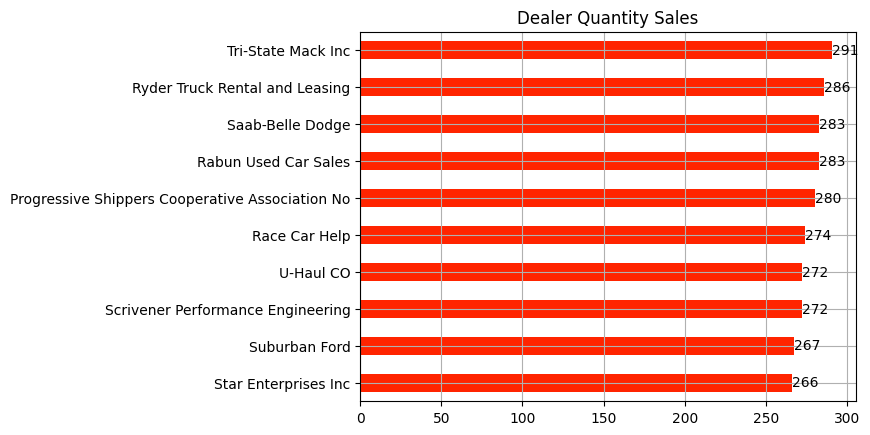

In [183]:
ax = df['Dealer_Name'].value_counts(ascending=True).tail(10).plot(kind='barh',title='Dealer Quantity Sales')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(True)
plt.show()

In [184]:
df[['Dealer_Name','Price ($)']].groupby('Dealer_Name').sum().sort_values('Price ($)',ascending=False).head(10)

,Price ($)
Dealer_Name,
Tri-State Mack Inc,8473065
Progressive Shippers Cooperative Association No,8021064
Rabun Used Car Sales,7959057
Scrivener Performance Engineering,7832059
Saab-Belle Dodge,7794067
Race Car Help,7758067
U-Haul CO,7754064
Suburban Ford,7614557
Ryder Truck Rental and Leasing,7538964


***Business Question 3 : Top Kuantiti dan Sales Dealer Region diurutkan dari yang terbanyak menurut selera kelas menengah?***

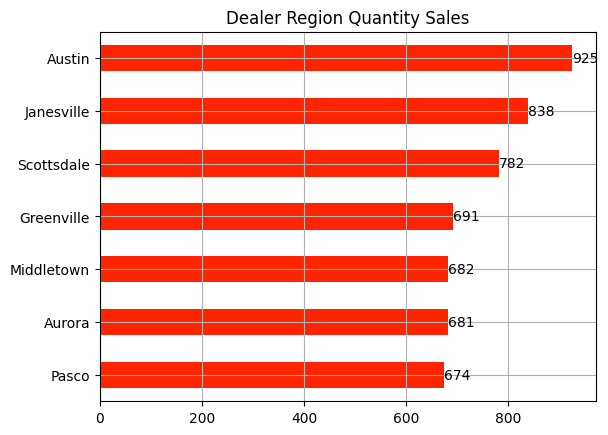

In [185]:
ax = df['Dealer_Region'].value_counts(ascending=True).tail(10).plot(kind='barh',title='Dealer Region Quantity Sales')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(True)
plt.show()

In [186]:
df[['Dealer_Region','Price ($)']].groupby('Dealer_Region').sum().sort_values('Price ($)',ascending=False).head(10)

,Price ($)
Dealer_Region,
Austin,26084208
Janesville,23402700
Scottsdale,21799170
Aurora,19046182
Greenville,19036374
Middletown,18844050
Pasco,18793185


***Business Question 4 : Bagaimana komposisi selera customer terhadap pilihan jenis transmission dan Engine berdasarkan gendernya?***

In [187]:
# Transmission vs Gender
GenderTransmission = (df
      .groupby("Transmission")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
GenderTransmission

Gender,Female,Male
Transmission,,
Auto,21.05,78.95
Manual,22.07,77.93


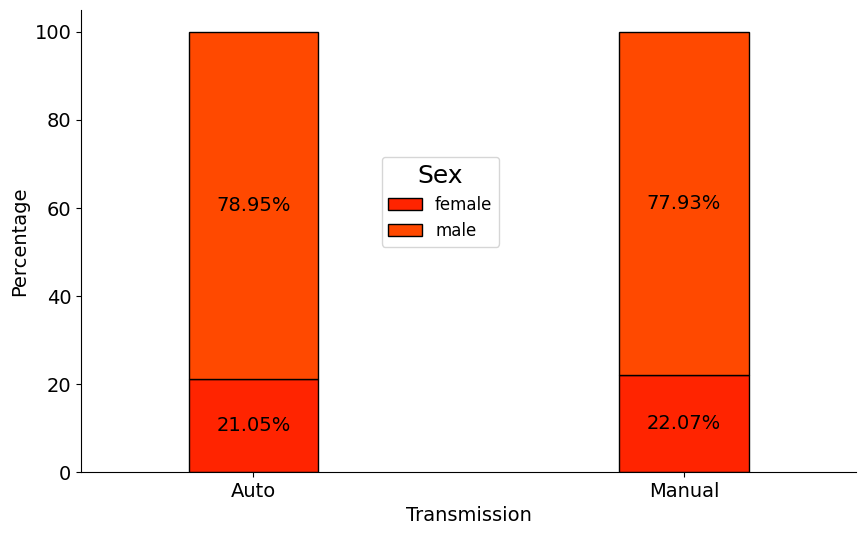

In [199]:
fig, ax = plt.subplots(figsize = (10, 6))
GenderTransmission.plot(kind = "bar",
                        stacked = True,
                        ax = ax,
                        width = 0.3,
                        edgecolor = "black")
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14)
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Transmission", size = 14)
ax.legend(labels = ["female", "male"],
          fontsize = 12,
          title = "Sex",
          title_fontsize = 18)
ax.legend_.set_bbox_to_anchor([0.55, 0.7])

In [189]:
df.columns

Index(['Customer Name', 'Phone', 'Gender', 'Dealer_Name', 'Dealer_Region',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Body Style'],
      dtype='object')



---



---



***Business Question 5 : Tampilkan detail 10 customer kelas menengah yang membeli mobil diatas rata-rata yaitu lebih dari 60000 $?***

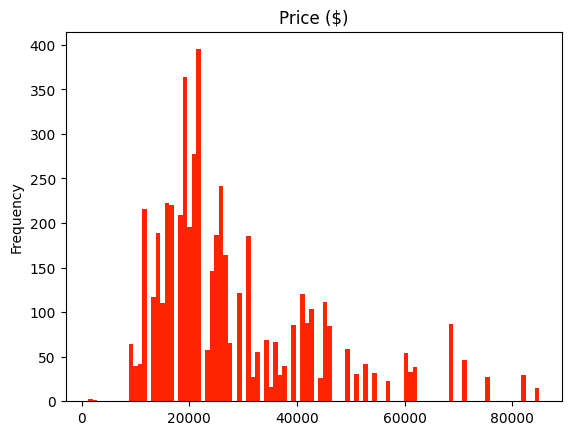

In [206]:
# Check Persebaran Price ($)
ax = df['Price ($)'].plot(kind='hist', bins=100, title = 'Price ($)')
plt.show()

In [208]:
df[df['Price ($)']>60000].sort_values('Price ($)',ascending=False).head(10)

,Customer Name,Phone,Gender,Dealer_Name,Dealer_Region,Company,Model,Engine,Transmission,Color,Price ($),Body Style
20002,Christian,6313664,Male,Enterprise Rent A Car,Aurora,Mercedes-B,S-Class,Overhead Camshaft,Manual,Black,85001,SUV
18952,Alma,8339178,Female,C & M Motors Inc,Aurora,Mercedes-B,S-Class,Overhead Camshaft,Manual,Black,85001,SUV
13979,Mateo,7022622,Female,Tri-State Mack Inc,Middletown,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85001,Passenger
11265,Perla,7947218,Male,Suburban Ford,Janesville,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85000,Passenger
21616,Laura,6122063,Male,Buddy Storbeck's Diesel Service Inc,Middletown,Audi,A6,Overhead Camshaft,Manual,Black,85000,SUV
22327,Katie,7580570,Female,Diehl Motor CO Inc,Austin,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85000,Passenger
23024,Golda,7737745,Male,Tri-State Mack Inc,Scottsdale,Mercedes-B,S-Class,Overhead Camshaft,Manual,Black,85000,SUV
1973,Lizbeth,8531461,Male,Nebo Chevrolet,Middletown,Audi,A6,Overhead Camshaft,Manual,Black,85000,SUV
19988,Bryan,7848157,Male,Saab-Belle Dodge,Aurora,Toyota,RAV4,Overhead Camshaft,Manual,Black,85000,Hatchback
9589,Romeo,8253065,Male,Diehl Motor CO Inc,Middletown,Mercedes-B,S-Class,Overhead Camshaft,Manual,Black,85000,SUV
